# Import mnist from tensorflow

In [ ]:
## Importing mnist from tensorflow.keras.datasets
from tensorflow.keras.datasets import mnist
import numpy as np

# Load data directly
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape if needed for traditional ML
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

2025-09-28 12:58:28.678314: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-28 12:58:28.690017: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-28 12:58:29.122233: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-28 12:58:31.295224: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


# Show dataset with matplotlib

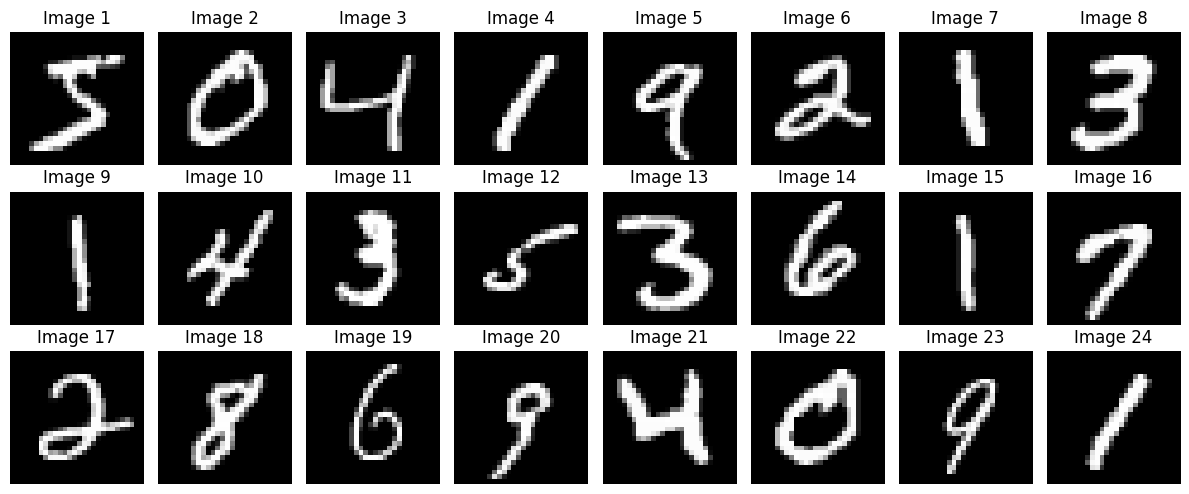

In [5]:
# Plot multiple images in a grid
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 8, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap='gray')  
    ax.set_title(f"Image {i + 1}")
    ax.axis('off')

plt.tight_layout()
plt.show()

# Preprocessing

In [7]:
from tensorflow.keras.utils import to_categorical

# Normalize the pixel values to the range [0, 1]
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

print("Preprocessing complete.")

Preprocessing complete.


# Reshaping the data and Desing the CNN model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Reshape the data to include the channel dimension
x_train_reshaped = x_train_normalized.reshape(-1, 28, 28, 1)
x_test_reshaped = x_test_normalized.reshape(-1, 28, 28, 1)

# 1. Design of a CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/home/david/Documentos/estudios/2025-2 ITM/EII/venv-eii/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-28 14:35:34.493830: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


# compile the model

In [ ]:
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model

In [ ]:
# 2. Training the model
history = model.fit(x_train_reshaped, y_train_one_hot, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9555 - loss: 0.1460 - val_accuracy: 0.9774 - val_loss: 0.0746
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9854 - loss: 0.0465 - val_accuracy: 0.9843 - val_loss: 0.0550
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9896 - loss: 0.0318 - val_accuracy: 0.9853 - val_loss: 0.0558
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9922 - loss: 0.0238 - val_accuracy: 0.9907 - val_loss: 0.0337
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9944 - loss: 0.0164 - val_accuracy: 0.9905 - val_loss: 0.0376
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9951 - loss: 0.0140 - val_accuracy: 0.9902 - val_loss: 0.0396
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9967 - loss: 0.0100 - val_accuracy: 0.9918 - val_loss: 0.0347
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9972 - 

# Model evaluation

In [10]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test_one_hot)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9918 - loss: 0.0341
Test Loss: 0.03407203406095505
Test Accuracy: 0.9918000102043152


## Test Loss: 0.034:

This is the value of the loss function on the test dataset. A low test loss (close to 0) indicates that the model's predictions are very close to the actual labels.
A loss of 0.034 suggests that the model has learned the patterns in the data well and is making accurate predictions.

## Test Accuracy: 0.9918 (99.18%):

This is the percentage of correctly classified samples in the test dataset.
An accuracy of 99.18% is excellent, especially for image classification tasks like digit recognition (e.g., MNIST dataset). It indicates that the model is highly effective at generalizing to unseen data.

In [13]:
import pickle

# Save the model to a .pkl file
with open('model_numbers.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model exported as model.pkl")

Model exported as model.pkl


# Test your model

In [23]:
import pickle

with open('model_numbers.pkl', 'rb') as file:
    model = pickle.load(file)

print("Model loaded.")


Model loaded.


In [36]:
import cv2
import numpy as np

# Load the image in grayscale
img = cv2.imread('./numbers/7.jpg', cv2.IMREAD_GRAYSCALE)

# Resize to 28x28 (if needed)
img = cv2.resize(img, (28, 28))

# Normalize to [0, 1]
img = img / 255.0

# Reshape for model input: (batch, height, width, channels)
img = img.reshape(1, 28, 28, 1)


In [37]:
prediction = model.predict(img)
predicted_digit = np.argmax(prediction)

print(f"Predicted digit: {predicted_digit}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted digit: 7
